# Dexian Data Analytics Technical Challenge

**Author:** James Meredith

Active Project Dates: Mar 15th, 2024 - Mar 22nd, 2024

***

![alt text](./images/company_logo.png)

## Abstract

This technical challenge aims to provide actionable insights from a dataset containing information on American colleges and universities. By applying advanced data analytics techniques, this project seeks to uncover trends and patterns that could assist a consulting firm in advising institutions of higher learning. Through meticulous data analysis, key insights regarding institutional types, acceptance rates, tuition fees, and graduation rates were discovered, enabling data-driven decision-making.

## Business Problem

The scenario for this technical challenge was as follows:

    You are working with a firm that provides consulting services for institutions of higher learning. The team has gathered some data about a number of schools, and they are hoping you can identify some meaningful insights that could help them as they advise various colleges and universities this year.

## The Data

The dataset for this challenge provides detailed information about various American colleges and universities, including public/private designation, application statistics, tuition fees, and graduation rates. The aim was to analyze this dataset to identify trends and insights that could inform strategic advice for higher education institutions.

The dataset used for this technical challenge can be found at the following: https://docs.google.com/spreadsheets/d/1rThcHm3ZATkhOtsGL6477nQaePrIzcsl/export

While outside resources could have been considered in order to enrich the initial dataset, due to time constraints and a desire to stay within the bounds of the technical challenge, no outside resources were included in the data pool.

### Initial Exploration of The Dataset

Here we ingest the dataset using the Pandas library and perform an initial exploration of the dataset using Pandas, Matplotlib, and Seaborn:

In [254]:
# Imports used in the Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Ingest the dataset
filepath = './data/Universities.xlsx'
df = pd.read_excel(filepath,sheet_name='usnews3.data.9 .SS (v5.0)')

In [255]:
# Generate an overview of the data
df.head()

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [257]:
df.describe()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,1302.000000,1292.000000,1291.000000,1297.000000,1067.000000,1100.000000,1299.000000,1270.000000,1272.000000,1282.000000,981.000000,804.000000,1028.000000,1254.000000,1121.000000,1270.000000,1300.000000,1204.000000
mean,1.639017,2752.097523,1870.683191,778.880493,25.671978,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,2514.681957,2060.983831,392.012646,549.972887,1389.291704,68.645669,14.858769,60.405316
std,0.480470,3541.974712,2250.866400,884.578274,18.312618,20.881316,4544.847897,1672.202912,5348.162626,4170.770851,1150.836848,661.742099,469.379234,167.355386,714.247857,17.825627,5.186399,18.889058
min,1.000000,35.000000,35.000000,18.000000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,1.000000,695.750000,554.500000,236.000000,13.000000,36.750000,966.000000,131.250000,2580.000000,6111.000000,1710.000000,1619.250000,130.000000,480.000000,900.000000,57.000000,11.800000,47.000000
50%,2.000000,1470.000000,1095.000000,447.000000,21.000000,50.000000,1812.000000,472.000000,8050.000000,8670.000000,2200.000000,1980.000000,264.500000,502.000000,1250.000000,71.000000,14.300000,60.000000
75%,2.000000,3314.250000,2303.000000,984.000000,32.000000,66.000000,4539.500000,1313.000000,11600.000000,11659.000000,3040.000000,2401.500000,480.000000,600.000000,1794.000000,82.000000,17.600000,74.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


We note a few things here:
- Dataset is 1302 rows (excluding headers) by 20 columns
- Dataset contains a mixture of data types (categorical and numeric), some of which are improperly formatted upon ingestion.
- Dataset contains null values
- Column Headers are a bit difficult to read

And from a cursory look at the summary statistics:
- Dataset contains illogical/anomalous values (ie. graduation rates, % of faculty with PhDs both contain values over 100%)

We'll address these issues in the cleaning section of this notebook next.

## Data Cleaning

Here we'll begin the process of cleaning the dataset.
Issues addressed are as follows:

- Change Column Names to Improve Readability
- Handle Missing Values
- Handle Duplicate Values
- Remove or Correct Misc. Anomalous Data
- Handle Outliers
- Correct Data Types
- Feature Engineering


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

### Changing Column Names To Improve Readability
Firstly, Column Names have been changed for improved readability

In [259]:
# Renaming columns for improved readability
df.rename(columns={
    'College Name': 'college_name',
    'State': 'state',
    'Public (1)/ Private (2)': 'institution_type',
    '# appli. rec\'d': 'applications_received',
    '# appl. accepted': 'applications_accepted',
    '# new stud. enrolled': 'new_students_enrolled',
    '% new stud. from top 10%': 'percent_from_top_10',
    '% new stud. from top 25%': 'percent_from_top_25',
    '# FT undergrad': 'full_time_undergrads',
    '# PT undergrad': 'part_time_undergrads',
    'in-state tuition': 'in_state_tuition',
    'out-of-state tuition': 'out_of_state_tuition',
    'room': 'room_costs',
    'board': 'board_costs',
    'add. fees': 'additional_fees',
    'estim. book costs': 'estimated_book_costs',
    'estim. personal $': 'estimated_personal_expenses',
    '% fac. w/PHD': 'percent_faculty_with_phd',
    'stud./fac. ratio': 'student_faculty_ratio',
    'Graduation rate': 'graduation_rate',
},inplace=True)

In [260]:
df.columns

Index(['college_name', 'state', 'institution_type', 'applications_received',
       'applications_accepted', 'new_students_enrolled', 'percent_from_top_10',
       'percent_from_top_25', 'full_time_undergrads', 'part_time_undergrads',
       'in_state_tuition', 'out_of_state_tuition', 'room_costs', 'board_costs',
       'additional_fees', 'estimated_book_costs',
       'estimated_personal_expenses', 'percent_faculty_with_phd',
       'student_faculty_ratio', 'graduation_rate'],
      dtype='object')

### Handling Null Values
Next, here we discuss various strategies for handling missing values in the dataset.

In [261]:
# Calculate percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

college_name                    0.000000
state                           0.000000
institution_type                0.000000
applications_received           0.768049
applications_accepted           0.844854
new_students_enrolled           0.384025
percent_from_top_10            18.049155
percent_from_top_25            15.514593
full_time_undergrads            0.230415
part_time_undergrads            2.457757
in_state_tuition                2.304147
out_of_state_tuition            1.536098
room_costs                     24.654378
board_costs                    38.248848
additional_fees                21.044547
estimated_book_costs            3.686636
estimated_personal_expenses    13.901690
percent_faculty_with_phd        2.457757
student_faculty_ratio           0.153610
graduation_rate                 7.526882
dtype: float64


Possible strategies for handling Null Values in the dataset are as follows:
- Removing Null values from the dataset
- Filling in Null values (by imputing the mean, median, using KNNImputer, etc.)
- Setting Nulls = 0
- De-emphasis or Elimination of Column from Analysis Entirely

Next we'll discuss the pros and cons of each method, and discuss how we'll apply them to the dataset.

**1. Removing Null values from the dataset**
   - Pros:
     - Ensures Data Purity and avoids the introduction of bias
     - Simplicity
   - Cons:
     - Data Loss and Reduction in Statistical Power: Continued removal of data from the dataset can limit the number of overall observations and reduce statistical power

**2. Filling in Null Values:**
   - Pros:
     - Data Preservation: We maximize the preservation of the overall dataset
   - Cons:
     - Possible Introduction of Bias: If the imputation method does not align well with the true data distribution or the reason behind the missingness, we risk introducing bias into the dataset.
     - Reduced variability: Replacing missing values with the median can artificially reduce the variability in the dataset, leading to an underestimate in the observed variance, covariance, etc.

**3. Setting Nulls = 0:**
  - Depending on the method of data collection, null values here might be indicating a true value of zero. Because it was unclear from this dataset, the author chose not to use this method when handling null values.

**4. De-emphasis or Elimination of Column from Analysis Entirely:**
  - For columns with a high percentage of missing values, it may be wise to eliminate them from the analysis entirely, or simply leave the column as-is and acknowledge a lack of data during the final analysis.

<br>

To decide how to apply each strategy to the dataset, we'll categorize each column according to it's percentage of missing values and assign one of the above strategies accordingly. Categories are as follows:
- Columns with 0% Missing Values
- Columns with a Small Percentage of Missing Values (<5%)
- Columns with a Moderate Percentage of Missing Values (5-20%)
- Columns with a High Amount of Missing Values (>20%)

<br>

Columns with 0% Missing Values - unchanged

    college_name
    state
    institution_type
    percent_faculty_with_phd
    student_faculty_ratio
    graduation_rate

Columns with a Small Percentage of Missing Values (<5%) - We'll remove these from the dataset to maximize data purity, although filling in null values via imputation would have also been appropriate here.

    applications_received - 0.511073%
    applications_accepted - 0.425894%
    new_students_enrolled - 0.170358%
    full_time_undergrads - 0.255537%
    part_time_undergrads - 2.470187%
    in_state_tuition - 2.129472%
    out_of_state_tuition - 1.277683%
    estimated_book_costs - 2.896082%
    percent_faculty_with_phd - 2.457757%

Columns with a Moderate Percentage of Missing Values (5-20%) - For percent_from_top_10 and percent_from top_25, we'll make the assumption that missing values should be properly interpreted as 0, meaning no students from the top of high school classes attended these universities, although confirmation of this from an enhanced understanding of the data gathering process would be desirable. For estimate_personal_expenses and additional_fees, we'll impute the median (which is more resistant to skewness in the distribution in the data than the mean), as it's assumed that ever university will have some additional fees associated with a program, and every student will face some out-of-pocket costs to attend a university, even if only minimally. For graduation rate, it's assumed that every accredited university has at level some level of graduation, and so the median will be imputed for missing values rather than setting them to 0.

    percent_from_top_10 - 15.587734%
    percent_from_top_25 - 13.117547%
    estimated_personal_expenses - 12.095400%
    additional_fees - 20.528109%
    graduation_rate - 7.526882%

Columns with a High Amount of Missing Values (>20%) - Due to the high number of missing values and data integrity concerns, we'll leave these columns as-is be de-emphasis them from the analysis.

    room_costs - 23.594549%
    board_costs - 37.223169%

In [262]:
# Drop Missing values from columns with small percentage of null values
df.dropna(subset=['applications_received', 'applications_accepted', 'new_students_enrolled', 'full_time_undergrads', 'part_time_undergrads', 'in_state_tuition','out_of_state_tuition','estimated_book_costs','percent_faculty_with_phd'], inplace=True)

In [263]:
# Fill percent_from_top_10 and percent_from_top_25 with 0
df['percent_from_top_10'].fillna(0, inplace=True)
df['percent_from_top_25'].fillna(0, inplace=True)

In [264]:
# Fill estimated_personal_expenses and additional_fees with median
df['estimated_personal_expenses'].fillna(df['estimated_personal_expenses'].median(), inplace=True)
df['additional_fees'].fillna(df['additional_fees'].median(), inplace=True)
df['graduation_rate'].fillna(df['graduation_rate'].median(), inplace=True)

In [265]:
# Calculate percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

college_name                    0.000000
state                           0.000000
institution_type                0.000000
applications_received           0.000000
applications_accepted           0.000000
new_students_enrolled           0.000000
percent_from_top_10             0.000000
percent_from_top_25             0.000000
full_time_undergrads            0.000000
part_time_undergrads            0.000000
in_state_tuition                0.000000
out_of_state_tuition            0.000000
room_costs                     22.723404
board_costs                    37.191489
additional_fees                 0.000000
estimated_book_costs            0.000000
estimated_personal_expenses     0.000000
percent_faculty_with_phd        0.000000
student_faculty_ratio           0.000000
graduation_rate                 0.000000
dtype: float64


### Handling Duplicate Data
Next we check for and handle duplicates in the dataset.

In [266]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


After cleaning missing values the dataset appears to have no duplicate values, and so we move on to the next stage of cleaning the dataset.

### Removing Misc. Anomalous Data
Upon our initial inspection of the dataset we noted some anomalous data (eg. graduation_rate and percent_faculty_with_phd both contain values over 100%). Anomalous data is expunged from the dataset here. We begin by examining summary statistics to check for illogical or impossible values like those noted above, and then perform some cross-field validation to check for logical inconsistencies (ex. in-state tuitions for a university that are higher than out of state, etc.)

In [267]:
df.describe()

,institution_type,applications_received,applications_accepted,new_students_enrolled,percent_from_top_10,percent_from_top_25,full_time_undergrads,part_time_undergrads,in_state_tuition,out_of_state_tuition,room_costs,board_costs,additional_fees,estimated_book_costs,estimated_personal_expenses,percent_faculty_with_phd,student_faculty_ratio,graduation_rate
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,908.000000,738.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,1.651064,2663.513191,1839.102979,769.183830,20.908936,44.501277,3642.939574,1047.977021,7906.854468,9297.880851,2515.396476,2044.966125,339.243404,545.386383,1370.233191,68.740426,14.879830,60.549787
std,0.476837,3408.747132,2187.012227,881.649886,18.098567,26.108308,4491.340232,1649.297896,5273.593853,4094.042844,1151.534021,637.178853,301.456287,159.317616,680.727562,17.617501,5.245299,17.965015
min,1.000000,52.000000,36.000000,18.000000,0.000000,0.000000,88.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,250.000000,8.000000,2.300000,8.000000
25%,1.000000,684.000000,553.000000,234.000000,9.000000,29.000000,967.500000,128.000000,2615.500000,6161.000000,1710.750000,1620.500000,150.000000,475.500000,920.000000,57.000000,11.800000,49.000000
50%,2.000000,1450.000000,1086.000000,444.000000,18.000000,46.000000,1803.000000,442.000000,8190.000000,8734.000000,2200.000000,1980.000000,260.000000,500.000000,1230.000000,71.000000,14.300000,60.000000
75%,2.000000,3286.500000,2309.000000,945.000000,29.000000,63.000000,4475.000000,1283.000000,11515.000000,11652.000000,3000.000000,2392.250000,400.000000,600.000000,1700.000000,82.000000,17.500000,73.000000
max,2.000000,48094.000000,26330.000000,7425.000000,96.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,3247.000000,2340.000000,6900.000000,103.000000,91.800000,118.000000


We note two instancies of anomalies - percent_faculty_with_phd greater than 100%, and graduation_rate over 100%. Because we cannot be certain whether these values were intended 10 be 100% or some other value entirely, we remove them from the dataset here.

In [268]:
# Example: Removing rows where 'Graduation rate' is above 100%
df = df[df['percent_faculty_with_phd'] <= 100]
df = df[df['graduation_rate'] <= 100]

In [269]:
df.describe()

,institution_type,applications_received,applications_accepted,new_students_enrolled,percent_from_top_10,percent_from_top_25,full_time_undergrads,part_time_undergrads,in_state_tuition,out_of_state_tuition,room_costs,board_costs,additional_fees,estimated_book_costs,estimated_personal_expenses,percent_faculty_with_phd,student_faculty_ratio,graduation_rate
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,906.000000,736.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,1.651321,2664.323956,1838.901961,769.838875,20.918159,44.507246,3647.261722,1049.639386,7911.670929,9301.590793,2516.556291,2045.112772,339.212276,545.293265,1371.589088,68.751066,14.878176,60.515772
std,0.476755,3410.909317,2188.022662,882.239351,18.110632,26.128999,4493.947007,1650.210361,5273.805830,4095.481045,1152.363247,637.646380,301.708472,159.437506,680.507288,17.551079,5.249229,17.894480
min,1.000000,52.000000,36.000000,18.000000,0.000000,0.000000,88.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,250.000000,8.000000,2.300000,8.000000
25%,1.000000,686.000000,553.000000,233.000000,9.000000,29.000000,967.000000,128.000000,2625.000000,6172.000000,1711.250000,1621.500000,150.000000,475.000000,930.000000,57.000000,11.800000,49.000000
50%,2.000000,1450.000000,1086.000000,444.000000,18.000000,46.000000,1803.000000,446.000000,8190.000000,8734.000000,2200.000000,1980.000000,260.000000,500.000000,1230.000000,71.000000,14.200000,60.000000
75%,2.000000,3281.000000,2306.000000,946.000000,29.000000,63.000000,4481.000000,1283.000000,11520.000000,11656.000000,3000.000000,2390.750000,400.000000,600.000000,1700.000000,82.000000,17.500000,73.000000
max,2.000000,48094.000000,26330.000000,7425.000000,96.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,3247.000000,2340.000000,6900.000000,100.000000,91.800000,100.000000


In [270]:
# Check if in-state tuition is ever higher than out-of-state tuition
inconsistent_tuition = df[df['in_state_tuition'] > df['out_of_state_tuition']]
print(f"Number of records where in-state tuition is higher than out-of-state tuition: {len(inconsistent_tuition)}")

# Keep only the records where in-state tuition is less than or equal to out-of-state tuition
df = df[df['in_state_tuition'] <= df['out_of_state_tuition']]

# Checking if accepted applications exceed received applications
inconsistent_applications = df[df['applications_received'] < df['applications_accepted']]
print(f"Number of records where accepted applications exceed received applications: {len(inconsistent_applications)}")

Number of records where in-state tuition is higher than out-of-state tuition: 2
Number of records where accepted applications exceed received applications: 0


### Handling Outliers
In this section we identify and discuss strategies for dealing with outliers.

**Possible Strategies for Dealing with Outliers**
- Removal
- Capping
- Transformation
- Leaving as Is

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college_name                 1171 non-null   object 
 1   state                        1171 non-null   object 
 2   institution_type             1171 non-null   int64  
 3   applications_received        1171 non-null   float64
 4   applications_accepted        1171 non-null   float64
 5   new_students_enrolled        1171 non-null   float64
 6   percent_from_top_10          1171 non-null   float64
 7   percent_from_top_25          1171 non-null   float64
 8   full_time_undergrads         1171 non-null   float64
 9   part_time_undergrads         1171 non-null   float64
 10  in_state_tuition             1171 non-null   float64
 11  out_of_state_tuition         1171 non-null   float64
 12  room_costs                   904 non-null    float64
 13  board_costs       

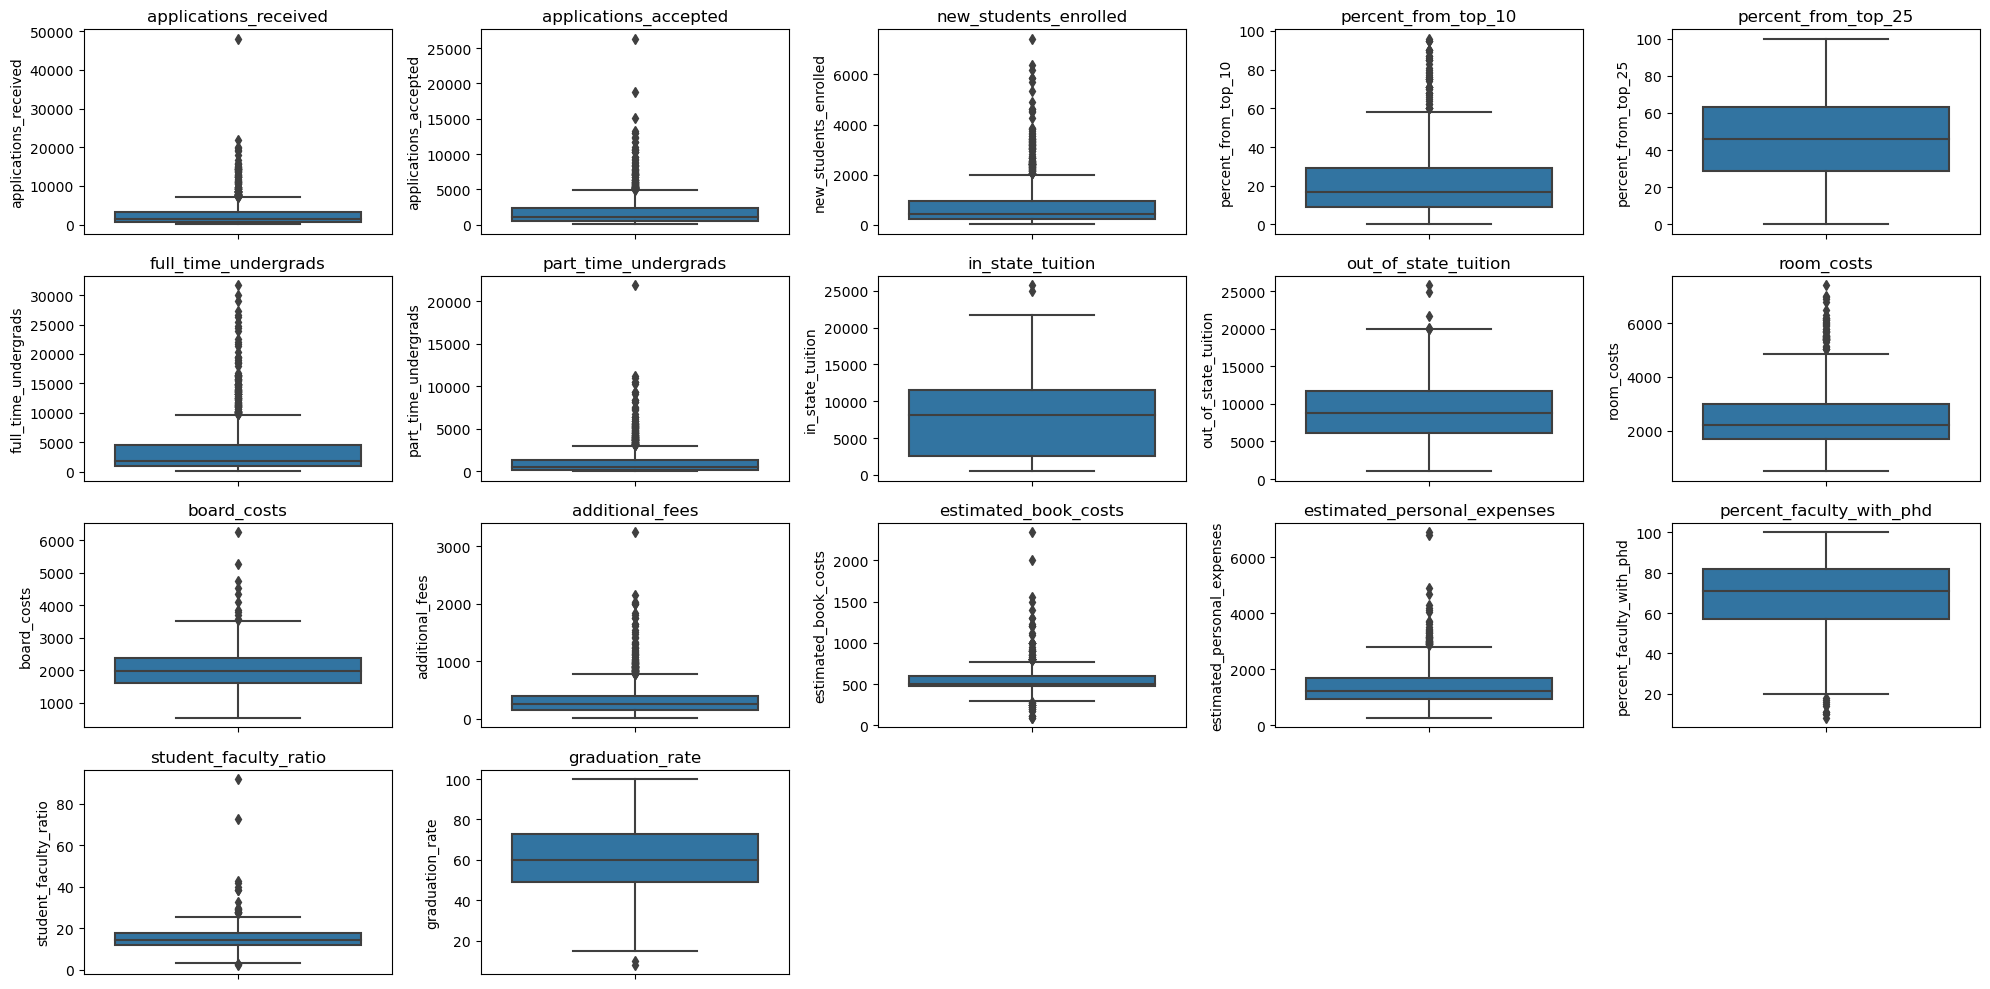

In [272]:
# Create Visualizations to check for Outliers

# Selecting numeric columns to visualize. Exclude 'institution_type' since it's categorical represented as int64.
numeric_cols = df.select_dtypes(include=['float64']).columns

# Create a large figure to accommodate the subplots
plt.figure(figsize=(20, 10))

# Create a boxplot for each numeric column
for index, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, index)  # Adjust grid dimensions (4x5) based on the number of columns
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

A number of columns appear to have numerous outliers, we attempt to get a value count for each column below:

In [273]:
outlier_counts = {}

# Loop through each column in the DataFrame
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate Q1 and Q3, and then IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outliers as values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    # Count the number of outliers
    outlier_counts[column] = outliers.shape[0]

# Print the number of outliers in each column
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

institution_type: 0 outliers
applications_received: 102 outliers
applications_accepted: 92 outliers
new_students_enrolled: 94 outliers
percent_from_top_10: 48 outliers
percent_from_top_25: 0 outliers
full_time_undergrads: 114 outliers
part_time_undergrads: 105 outliers
in_state_tuition: 2 outliers
out_of_state_tuition: 6 outliers
room_costs: 44 outliers
board_costs: 11 outliers
additional_fees: 93 outliers
estimated_book_costs: 81 outliers
estimated_personal_expenses: 41 outliers
percent_faculty_with_phd: 10 outliers
student_faculty_ratio: 21 outliers
graduation_rate: 2 outliers


While handling of outliers should ordinarily be done with great care and attention paid to the goals of the analysis and their affect on the data's distribution, due to the time constraints of this analysis we will retain them in the dataset and discuss them as they come up in the analysis section of this notebook.

### Correcting Data Types
Here we improve the formatting of several columns. For increased readability, we'll first convert the institution type (Public/Private) from a numeric representation to "Public" or "Private". Additionally, several columns referencing number of students, faculty, and applications, where decimal values don't make sense, are changed to integer data type here as well.

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college_name                 1171 non-null   object 
 1   state                        1171 non-null   object 
 2   institution_type             1171 non-null   int64  
 3   applications_received        1171 non-null   float64
 4   applications_accepted        1171 non-null   float64
 5   new_students_enrolled        1171 non-null   float64
 6   percent_from_top_10          1171 non-null   float64
 7   percent_from_top_25          1171 non-null   float64
 8   full_time_undergrads         1171 non-null   float64
 9   part_time_undergrads         1171 non-null   float64
 10  in_state_tuition             1171 non-null   float64
 11  out_of_state_tuition         1171 non-null   float64
 12  room_costs                   904 non-null    float64
 13  board_costs       

In [275]:
# Define a mapping dictionary to translate 1 to 'Public' and 2 to 'Private'
institution_type_map = {1: 'Public', 2: 'Private'}

# Use the map function to apply this translation to the 'Public (1)/ Private (2)' column
df['institution_type'] = df['institution_type'].map(institution_type_map)

In [276]:
# Correcting Data Types
data_types = {
    'institution_type' : 'object',
    'applications_received': 'int64',
    'applications_accepted': 'int64',
    'new_students_enrolled' : 'int64',
    'full_time_undergrads' : 'int64',
    'part_time_undergrads' : 'int64', 
}

# Apply the data type changes to your DataFrame
df = df.astype(data_types)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college_name                 1171 non-null   object 
 1   state                        1171 non-null   object 
 2   institution_type             1171 non-null   object 
 3   applications_received        1171 non-null   int64  
 4   applications_accepted        1171 non-null   int64  
 5   new_students_enrolled        1171 non-null   int64  
 6   percent_from_top_10          1171 non-null   float64
 7   percent_from_top_25          1171 non-null   float64
 8   full_time_undergrads         1171 non-null   int64  
 9   part_time_undergrads         1171 non-null   int64  
 10  in_state_tuition             1171 non-null   float64
 11  out_of_state_tuition         1171 non-null   float64
 12  room_costs                   904 non-null    float64
 13  board_costs       

### Feature Engineering
Here we create a few columns containing metrics helpful to our analysis, namely Acceptance Rate, Yield Rate, Total Cost of Attendance, Total Enrollment

In [278]:
# Create Aforementioned Columns
df['acceptance_rate'] = (df['applications_accepted'] / df['applications_received']) * 100
df['yield_rate'] = (df['new_students_enrolled'] / df['applications_accepted']) * 100
df['total_cost_in_state'] = df['in_state_tuition'] + df['room_costs'].fillna(0) + df['board_costs'].fillna(0) + df['additional_fees'] + df['estimated_book_costs'] + df['estimated_personal_expenses']
df['total_enrollment'] = df['full_time_undergrads'] + df['part_time_undergrads']

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1301
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college_name                 1171 non-null   object 
 1   state                        1171 non-null   object 
 2   institution_type             1171 non-null   object 
 3   applications_received        1171 non-null   int64  
 4   applications_accepted        1171 non-null   int64  
 5   new_students_enrolled        1171 non-null   int64  
 6   percent_from_top_10          1171 non-null   float64
 7   percent_from_top_25          1171 non-null   float64
 8   full_time_undergrads         1171 non-null   int64  
 9   part_time_undergrads         1171 non-null   int64  
 10  in_state_tuition             1171 non-null   float64
 11  out_of_state_tuition         1171 non-null   float64
 12  room_costs                   904 non-null    float64
 13  board_costs       

## Exploratory Data Analysis/Results
In this section, we analyze our cleaned prepared dataset

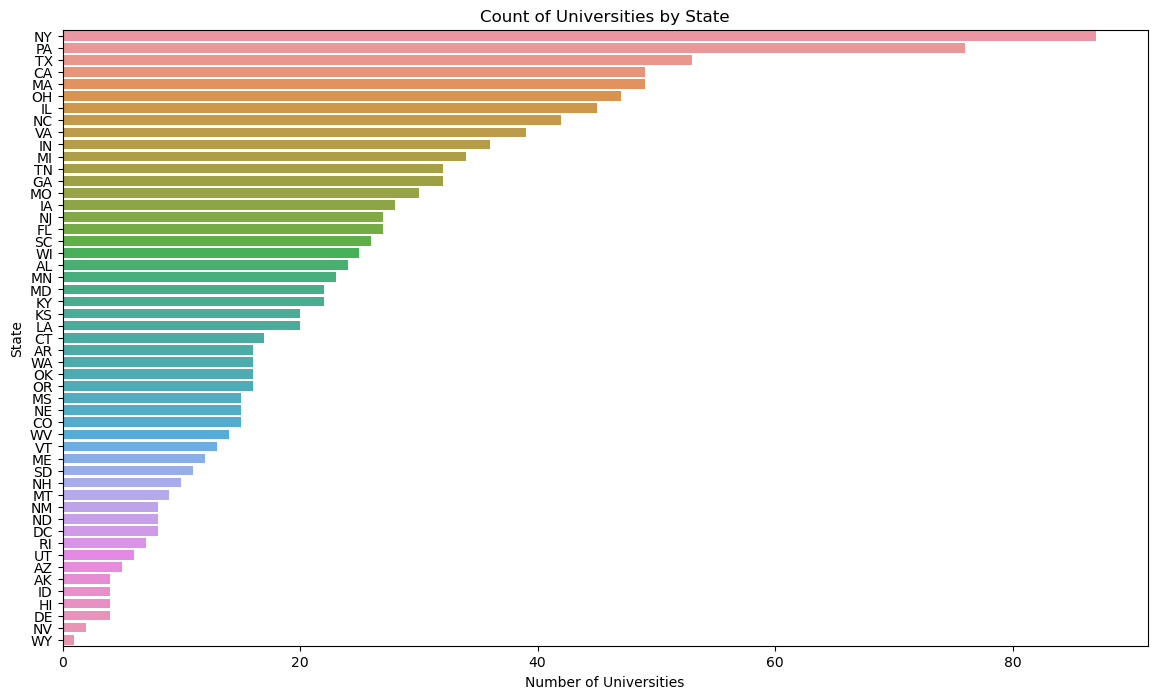

In [280]:
# Visualization: Distribution of Universities by State
plt.figure(figsize=(14, 8))
sns.countplot(y='state', data=df, order = df['state'].value_counts().index)
plt.title('Count of Universities by State')
plt.xlabel('Number of Universities')
plt.ylabel('State')
plt.show()

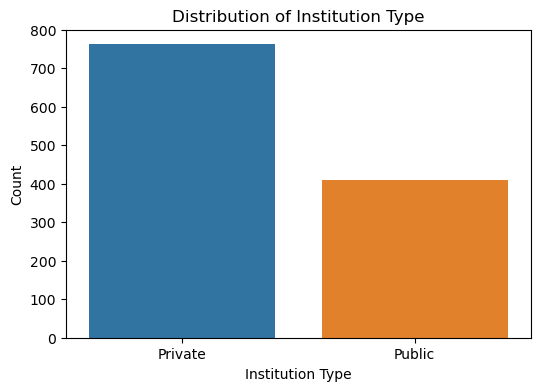

In [281]:
# Visualization: Distribution of public vs. private institutions
plt.figure(figsize=(6, 4))
sns.countplot(x='institution_type', data=df)
plt.title('Distribution of Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Count')
plt.show()

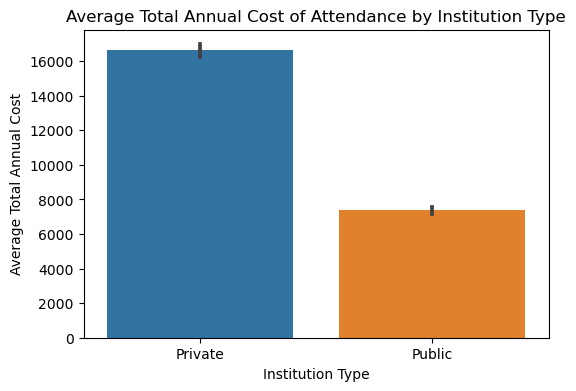

In [282]:
# Visualization: Average Total Annual Cost of Attendance for Public vs Private Institutions
df['total_cost'] = df['total_cost_in_state']
plt.figure(figsize=(6, 4))
sns.barplot(x='institution_type', y='total_cost', data=df, estimator=np.mean)
plt.title('Average Total Annual Cost of Attendance by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Average Total Annual Cost')
plt.show()

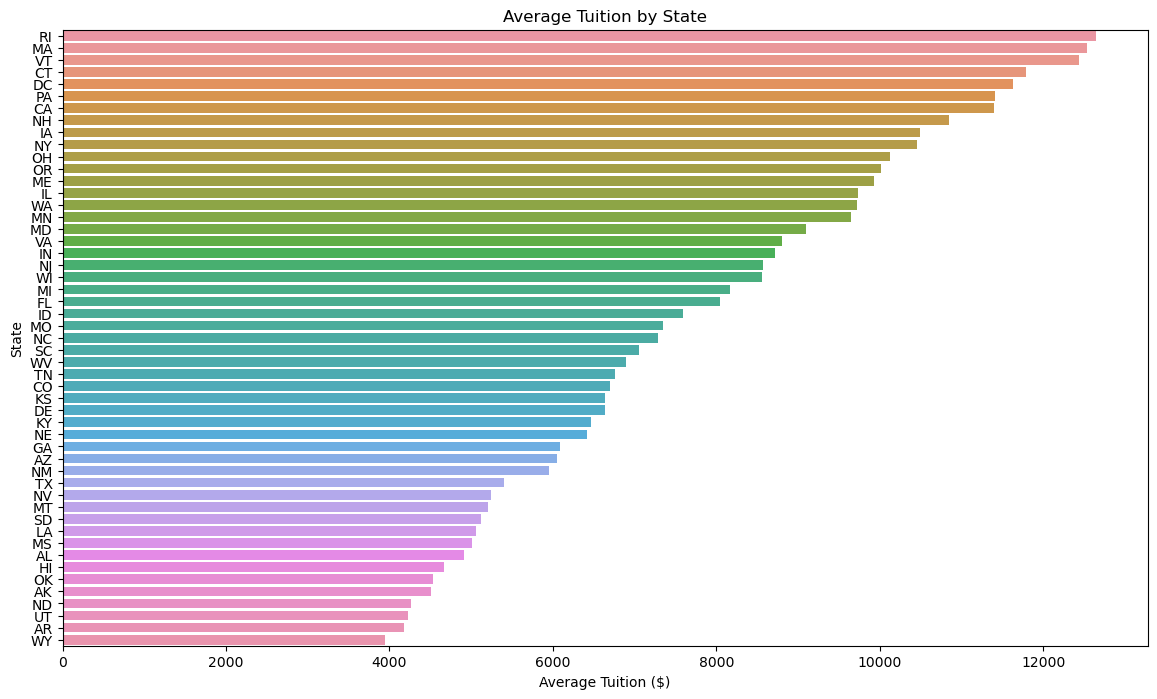

In [ ]:
# Visualization: Average Total Tuition Cost by State
plt.figure(figsize=(14, 8))
df['average_tuition'] = (df['in-state tuition'] + df['out-of-state tuition']) / 2
state_tuition = df.groupby('State')['average_tuition'].mean().sort_values(ascending=False)
sns.barplot(x=state_tuition.values, y=state_tuition.index)
plt.title('Average Tuition by State')
plt.xlabel('Average Tuition ($)')
plt.ylabel('State')
plt.show()

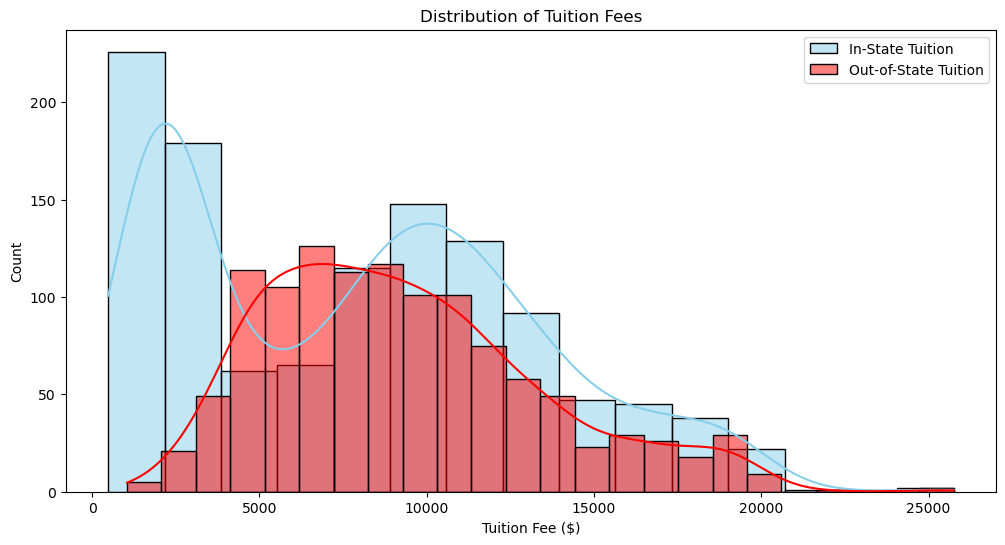

In [287]:
# Visualization: Distribution of Tuition Fees
plt.figure(figsize=(12, 6))
sns.histplot(df['in_state_tuition'], kde=True, color='skyblue', label='In-State Tuition')
sns.histplot(df['out_of_state_tuition'], kde=True, color='red', label='Out-of-State Tuition')
plt.title('Distribution of Tuition Fees')
plt.xlabel('Tuition Fee ($)')
plt.ylabel('Count')
plt.legend()
plt.show()

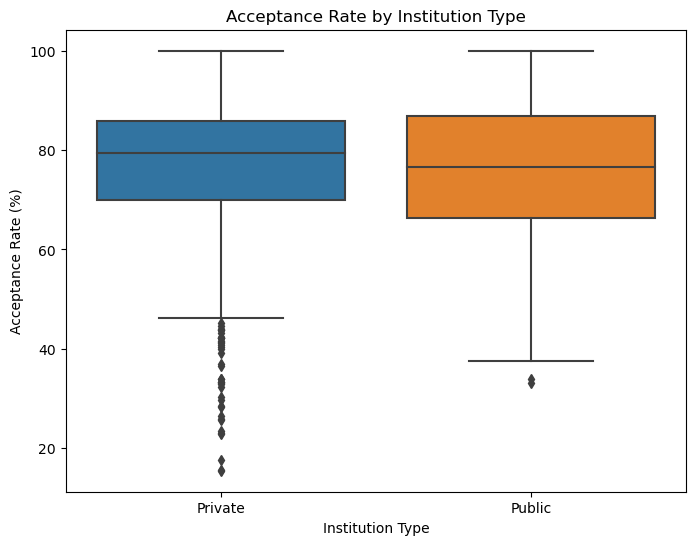

In [291]:
# Visualization: Distribution of Acceptance Rates by Institution Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='institution_type', y='acceptance_rate', data=df)
plt.title('Acceptance Rate by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Acceptance Rate (%)')
plt.show()

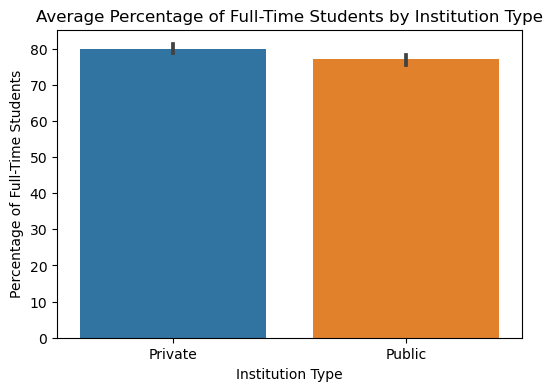

In [283]:
# Visualization: Average Student Body Composition (Full-time vs. Part-time)
df['total_students'] = df['full_time_undergrads'] + df['part_time_undergrads']
df['percent_full_time'] = (df['full_time_undergrads'] / df['total_students']) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x='institution_type', y='percent_full_time', data=df, estimator=np.mean)
plt.title('Average Percentage of Full-Time Students by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Percentage of Full-Time Students')
plt.show()

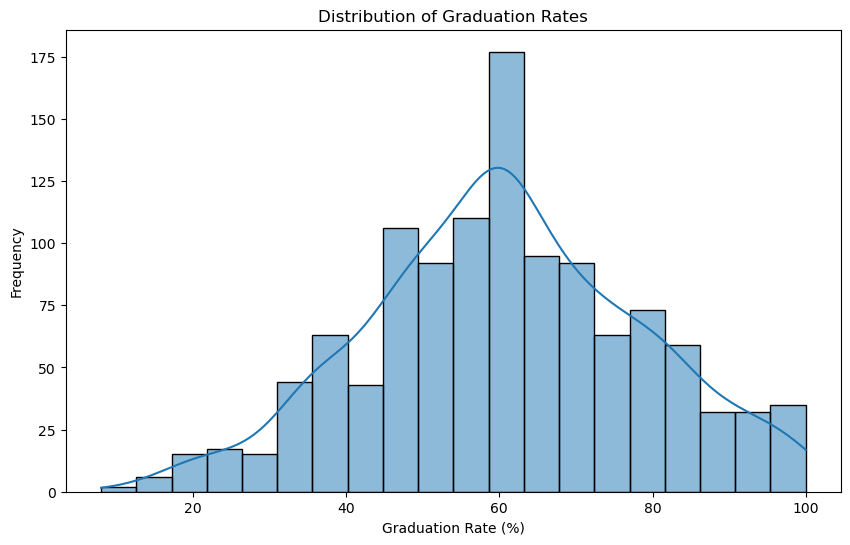

In [288]:
# Visualization: Distribution of Graduation Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['graduation_rate'], bins=20, kde=True)
plt.title('Distribution of Graduation Rates')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Frequency')
plt.show()

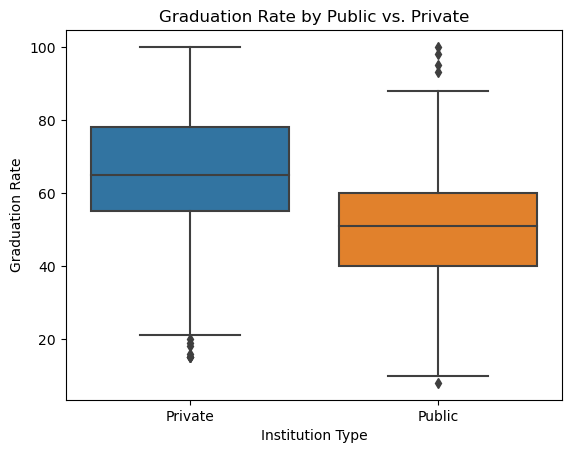

In [284]:
# Visualization: Average Student Body Composition (Full-time vs. Part-time)
sns.boxplot(x='institution_type', y='graduation_rate', data=df)
plt.title('Graduation Rate by Public vs. Private')
plt.xlabel('Institution Type')
plt.ylabel('Graduation Rate')
plt.show()

<Figure size 800x600 with 0 Axes>

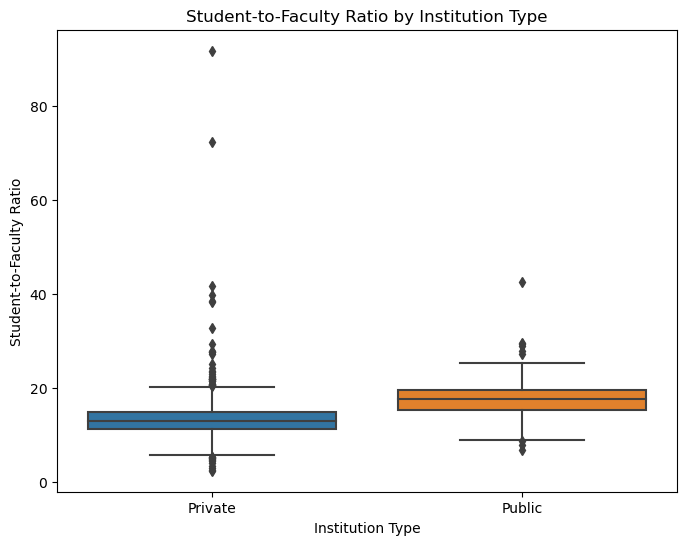

In [290]:
# Visualization: Student-to-Faculty Ratio by Institution Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='institution_type', y='student_faculty_ratio', data=df)
plt.title('Student-to-Faculty Ratio by Institution Type')
plt.xlabel('Institution Type')
plt.ylabel('Student-to-Faculty Ratio')
plt.show()

In [212]:
# Calculate the correlation between 'graduation_rate' and variables in the dataset

# Calculate the correlation matrix for the dataframe
correlation_matrix = df.corr()

# Extract the 'graduation_rate' column to see correlations with other variables
graduation_rate_correlation = correlation_matrix['graduation_rate'].sort_values(ascending=False)

# Print the correlations
print(graduation_rate_correlation)


graduation_rate                1.000000
out_of_state_tuition           0.596518
in_state_tuition               0.580855
total_cost_in_state            0.574065
percent_from_top_10            0.539111
percent_from_top_25            0.498203
board_costs                    0.390641
percent_faculty_with_phd       0.287155
room_costs                     0.243991
applications_received          0.137240
applications_accepted          0.063971
additional_fees                0.050750
estimated_book_costs           0.005696
new_students_enrolled         -0.059394
full_time_undergrads          -0.096151
total_enrollment              -0.164624
estimated_personal_expenses   -0.197224
acceptance_rate               -0.236663
student_faculty_ratio         -0.284587
part_time_undergrads          -0.297154
yield_rate                    -0.318371
Name: graduation_rate, dtype: float64


C:\Users\James\AppData\Local\Temp\ipykernel_29048\2859158846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


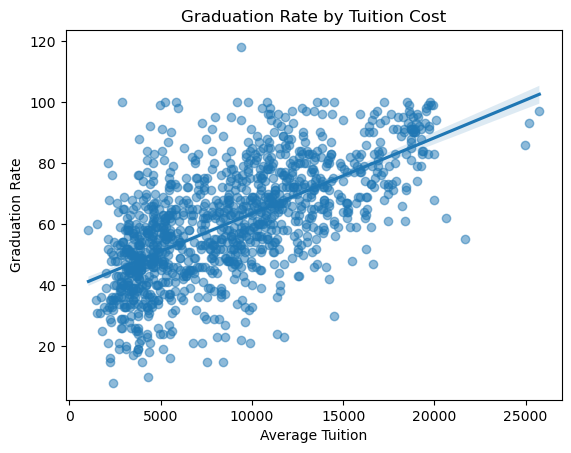

In [ ]:
sns.regplot(x='average_tuition', y='Graduation rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by Tuition Cost')
plt.xlabel('Average Tuition')
plt.ylabel('Graduation Rate')
plt.show()

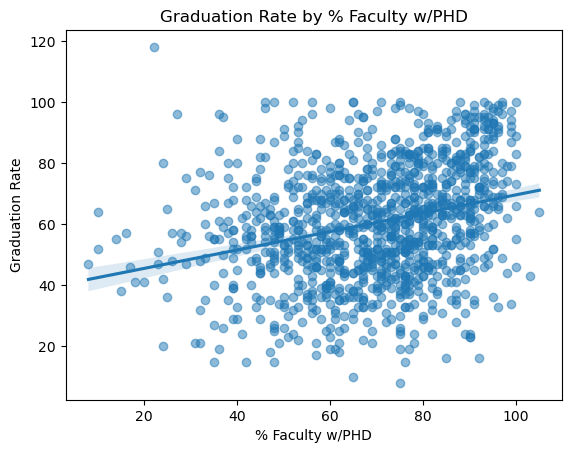

In [ ]:
sns.regplot(x='% fac. w/PHD', y='Graduation rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by % Faculty w/PHD')
plt.xlabel('% Faculty w/PHD')
plt.ylabel('Graduation Rate')
plt.show()

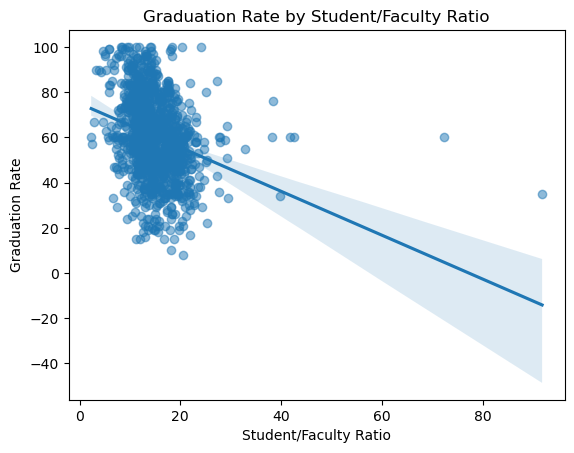

In [292]:
sns.regplot(x='student_faculty_ratio', y='graduation_rate', data=df, scatter_kws={'alpha':0.5})
plt.title('Graduation Rate by Student/Faculty Ratio')
plt.xlabel('Student/Faculty Ratio')
plt.ylabel('Graduation Rate')
plt.show()


In [295]:
# Generate Summary Statistics
df.describe()

,applications_received,applications_accepted,new_students_enrolled,percent_from_top_10,percent_from_top_25,full_time_undergrads,part_time_undergrads,in_state_tuition,out_of_state_tuition,room_costs,...,percent_faculty_with_phd,student_faculty_ratio,graduation_rate,acceptance_rate,yield_rate,total_cost_in_state,total_enrollment,total_cost,total_students,percent_full_time
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,904.000000,...,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,2661.401366,1838.443211,769.619129,20.906917,44.493595,3647.936806,1047.527754,7909.197267,9301.883860,2519.537611,...,68.756618,14.881981,60.513237,76.088792,45.041695,13391.611443,4695.464560,13391.611443,4695.464560,78.954166
std,3409.315991,2188.810559,882.600645,18.119802,26.139218,4496.513985,1648.558020,5277.480869,4098.244588,1151.862241,...,17.536327,5.252689,17.909663,14.911831,16.425049,6136.324488,5602.006605,6136.324488,5602.006605,16.390979
min,52.000000,36.000000,18.000000,0.000000,0.000000,88.000000,1.000000,480.000000,1044.000000,500.000000,...,8.000000,2.300000,8.000000,15.448631,9.975397,2521.000000,100.000000,2521.000000,100.000000,11.431412
25%,687.000000,553.500000,233.000000,9.000000,29.000000,967.500000,128.000000,2615.500000,6161.000000,1714.250000,...,57.000000,11.800000,49.000000,68.689057,33.477811,8411.000000,1229.500000,8411.000000,1229.500000,68.666242
50%,1450.000000,1086.000000,444.000000,17.000000,46.000000,1803.000000,446.000000,8190.000000,8734.000000,2200.000000,...,71.000000,14.300000,60.000000,78.516903,42.250000,12906.000000,2323.000000,12906.000000,2323.000000,83.503836
75%,3280.500000,2303.000000,945.000000,29.000000,63.000000,4475.000000,1283.000000,11535.000000,11658.000000,3010.000000,...,82.000000,17.500000,73.000000,86.136346,53.475960,17875.500000,5730.000000,17875.500000,5730.000000,91.899260
max,48094.000000,26330.000000,7425.000000,96.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,...,100.000000,91.800000,100.000000,100.000000,244.243421,29355.000000,38338.000000,29355.000000,38338.000000,99.941349


## Discussion:
Summary Statistics for the datasets were as follows (see table above):
- Average applications received: 2661.4
- Average acceptance rate: 76%
- Average total enrollment (full and part-time): 4,695.4
- Average total annual cost of attendance: $13391.61


Analysis of the data revealed the following insights:
- The Greatest number of universities were located in New York, Pennsylvania, and Texas.
- The Average Total Annual Cost of Private Universities was OVER DOUBLE that of Public Universities, despite Public and Private Institutions being roughly just as selective. Despite this Graduation Rates at Private Universities are higher than Public (though this finding was not confirmed to be statistically significant using a hypothesis test, a task for further study).
- Roughly 80% of the average student body are full-time students
- Factors that most predicted high graduation rates were:
  - Tuition cost
  - Percent from Top 10%,25% of their High School Class
  - Low Student-Faculty Ratios
- Regarding graduation rates, percent of Faculty with PhD only showed a moderate effect on graduation rates, suggesting a potential cost-saving measure.

## Conclusion:

This project demonstrates the power of data analytics in uncovering meaningful insights from complex datasets. By applying a range of data analysis techniques, it was possible to provide the consulting firm with a comprehensive understanding of the higher education landscape, enabling informed strategic advice for their clients.

Future directions for this work could involve deeper analysis with larger datasets, the integration of external data sources for richer insights, and the application of machine learning models to predict trends and outcomes in the education sector.